In [80]:
import time
import numpy as np
from numpy.random import randint
import pandas as pd 
from pandas import Series, DataFrame

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.stats import norm
import seaborn as sns

from IPython.display import display, HTML
%matplotlib inline

# PART 1: COUNTINGSORT IMPLEMENTIERUNG


In [75]:
def countingsort(arr):
    
    #Umwandlung in Pandas.Series für Histogrammbildung
    hist = Series(arr)
    sns.distplot(hist,kde=False,rug=True,color='royalblue', bins=max(hist.index)*3, label='Häufigkeit')
    plt.ylim(0, max(hist.index)+1)
    plt.xlabel('Element')
    plt.ylabel('Häufigkeit')
    plt.title(r'$\mathrm{Array\ Histogram}$')
    plt.show()
    
    
    
    #Sortiertes Histogramm, fehlende Werte (NaN) werden durch 0 ersetzt
    sorted_hist = hist.value_counts().sort_index()
    cleaned_hist = Series(sorted_hist, index=range(max(sorted_hist.index)+1)).fillna(0)

    
    #Aufsummierung der Werte im Histogramm
    summed_hist = Series(cleaned_hist.cumsum()[:-1].values, index=range(1, max(arr)+1))
    
    #Bereinigung des summierten Histogramms
    summed_hist_cleaned = Series(summed_hist, index=range(max(arr)+1)).fillna(0)
    
    
    
    
    #Kreiere DataFrames zu A, B und Hilfsarray C
    
    #DataFrame A
    rows = len(arr)            #Anzahl Reihen
    columns_A = []             #Anzahl Spalten
    
    #Benenne die Spalten für A
    for num in range(rows):
        columns_A.append('A[' + str(num) + ']')
        
    #Kreiere DataFrame
    dframe_A = DataFrame(np.array(list(arr)*rows).reshape(rows, rows), columns=columns_A, index=range(rows))
    
    
    #Das Gleiche nun für Hilfsarray C
    hilfs_array = np.array(summed_hist_cleaned.values)
    columns = len(hilfs_array)
    columns_C = []
    for num in range(columns):
        columns_C.append('C[' + str(num) + ']')
    dframe_C = DataFrame(np.array(list(hilfs_array)*rows).reshape(rows ,columns), index=range(rows), columns=columns_C)
    
    
    #Fertige zunächst LEERES DataFrame B an
    columns_B = []
    for num in range(rows):
        columns_B.append('B[' + str(num) + ']')    

    dframe_B = DataFrame(np.nan, index=range(rows),columns=columns_B).fillna(' ')
    
    
    #Kreiere Dict, in dem Keys und Values für das später fertig sortierte Array B angelegt werden 
    b = {}
    lookup_value = 0
    for i in range(rows):
        #Iteration der Werte in C sobald in A nachgeschlagen 
        if i > 0:
            dframe_C['C['+str(lookup_value)+']'][i:] += 1
        
        #Wert, der in C nachgeschlagen, und in B an Stelle C[A[i]] eingefügt werden soll
        lookup_value = dframe_A.values[i][i]
        key = 'B[' + str(int(dframe_C.values[i][lookup_value])) + ']'
        b[key] = [lookup_value,i]
    
    
    #Füge Werte schließlich sortiert in B ein
    for key, value in b.items():
        dframe_B[key][value[1]:] = value[0]    
    
    #Konkatenieren der 3 DataFrames
    final_dframe = pd.concat([dframe_A, dframe_C, dframe_B], axis=1)
    
    
    #Sortiertes Array B
    result = []
    for i in range(len(b)):
        result.append(b['B[' + str(i) + ']'][0])

    print('\nDataFrame A\n')
    display(dframe_A)
    print('\nDataFrame C\n')
    display(dframe_C)
    print('\nDataFrame B\n')
    display(dframe_B)
    
    display(final_dframe)
    
    return dframe_B, result



# Testläufe


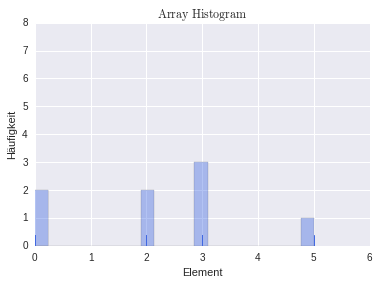


DataFrame A



,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7]
0,2,5,3,0,2,3,0,3
1,2,5,3,0,2,3,0,3
2,2,5,3,0,2,3,0,3
3,2,5,3,0,2,3,0,3
4,2,5,3,0,2,3,0,3
5,2,5,3,0,2,3,0,3
6,2,5,3,0,2,3,0,3
7,2,5,3,0,2,3,0,3



DataFrame C



,C[0],C[1],C[2],C[3],C[4],C[5]
0,0,2,2,4,7,7
1,0,2,3,4,7,7
2,0,2,3,4,7,8
3,0,2,3,5,7,8
4,1,2,3,5,7,8
5,1,2,4,5,7,8
6,1,2,4,6,7,8
7,2,2,4,6,7,8



DataFrame B



,B[0],B[1],B[2],B[3],B[4],B[5],B[6],B[7]
0,,,2,,,,,
1,,,2,,,,,5
2,,,2,,3,,,5
3,0,,2,,3,,,5
4,0,,2,2,3,,,5
5,0,,2,2,3,3,,5
6,0,0,2,2,3,3,,5
7,0,0,2,2,3,3,3,5


,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],C[0],C[1],...,C[4],C[5],B[0],B[1],B[2],B[3],B[4],B[5],B[6],B[7]
0,2,5,3,0,2,3,0,3,0,2,...,7,7,,,2,,,,,
1,2,5,3,0,2,3,0,3,0,2,...,7,7,,,2,,,,,5
2,2,5,3,0,2,3,0,3,0,2,...,7,8,,,2,,3,,,5
3,2,5,3,0,2,3,0,3,0,2,...,7,8,0,,2,,3,,,5
4,2,5,3,0,2,3,0,3,1,2,...,7,8,0,,2,2,3,,,5
5,2,5,3,0,2,3,0,3,1,2,...,7,8,0,,2,2,3,3,,5
6,2,5,3,0,2,3,0,3,1,2,...,7,8,0,0,2,2,3,3,,5
7,2,5,3,0,2,3,0,3,2,2,...,7,8,0,0,2,2,3,3,3,5


(  B[0] B[1] B[2] B[3] B[4] B[5] B[6] B[7]
 0              2                         
 1              2                        5
 2              2         3              5
 3    0         2         3              5
 4    0         2    2    3              5
 5    0         2    2    3    3         5
 6    0    0    2    2    3    3         5
 7    0    0    2    2    3    3    3    5, [0, 0, 2, 2, 3, 3, 3, 5])

In [76]:
countingsort([2,5,3,0,2,3,0,3])

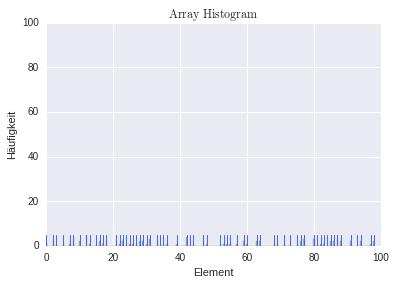


DataFrame A



,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],...,A[90],A[91],A[92],A[93],A[94],A[95],A[96],A[97],A[98],A[99]
0,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
1,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
2,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
3,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
4,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
5,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
6,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
7,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
8,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77
9,64,8,2,53,73,8,36,44,24,27,...,31,86,31,8,57,31,84,48,71,77



DataFrame C



,C[0],C[1],C[2],C[3],C[4],C[5],C[6],C[7],C[8],C[9],...,C[89],C[90],C[91],C[92],C[93],C[94],C[95],C[96],C[97],C[98]
0,0,1,1,3,4,4,5,5,6,9,...,92,92,92,94,94,95,97,97,97,98
1,0,1,1,3,4,4,5,5,6,9,...,92,92,92,94,94,95,97,97,97,98
2,0,1,1,3,4,4,5,5,7,9,...,92,92,92,94,94,95,97,97,97,98
3,0,1,2,3,4,4,5,5,7,9,...,92,92,92,94,94,95,97,97,97,98
4,0,1,2,3,4,4,5,5,7,9,...,92,92,92,94,94,95,97,97,97,98
5,0,1,2,3,4,4,5,5,7,9,...,92,92,92,94,94,95,97,97,97,98
6,0,1,2,3,4,4,5,5,8,9,...,92,92,92,94,94,95,97,97,97,98
7,0,1,2,3,4,4,5,5,8,9,...,92,92,92,94,94,95,97,97,97,98
8,0,1,2,3,4,4,5,5,8,9,...,92,92,92,94,94,95,97,97,97,98
9,0,1,2,3,4,4,5,5,8,9,...,92,92,92,94,94,95,97,97,97,98



DataFrame B



,B[0],B[1],B[2],B[3],B[4],B[5],B[6],B[7],B[8],B[9],...,B[90],B[91],B[92],B[93],B[94],B[95],B[96],B[97],B[98],B[99]
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,8,,,,...,,,,,,,,,,
2,,2,,,,,8,,,,...,,,,,,,,,,
3,,2,,,,,8,,,,...,,,,,,,,,,
4,,2,,,,,8,,,,...,,,,,,,,,,
5,,2,,,,,8,8,,,...,,,,,,,,,,
6,,2,,,,,8,8,,,...,,,,,,,,,,
7,,2,,,,,8,8,,,...,,,,,,,,,,
8,,2,,,,,8,8,,,...,,,,,,,,,,
9,,2,,,,,8,8,,,...,,,,,,,,,,


,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],...,B[90],B[91],B[92],B[93],B[94],B[95],B[96],B[97],B[98],B[99]
0,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
1,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
2,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
3,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
4,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
5,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
6,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
7,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
8,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,
9,64,8,2,53,73,8,36,44,24,27,...,,,,,,,,,,


(   B[0] B[1] B[2] B[3] B[4] B[5] B[6] B[7] B[8] B[9]  ...  B[90] B[91] B[92]  \
 0                                                     ...                      
 1                                   8                 ...                      
 2          2                        8                 ...                      
 3          2                        8                 ...                      
 4          2                        8                 ...                      
 5          2                        8    8            ...                      
 6          2                        8    8            ...                      
 7          2                        8    8            ...                      
 8          2                        8    8            ...                      
 9          2                        8    8            ...                      
 10         2                        8    8            ...                      
 11         2               

In [77]:
countingsort(randint(0,100,100))


# Segemente des Codes

In [457]:
arr = [2,5,3,0,2,3,0,3]
arr

[2, 5, 3, 0, 2, 3, 0, 3]

In [458]:
hist = Series(arr)
hist
sorted_hist = hist.value_counts().sort_index()

In [459]:
sorted_hist

0    2
2    2
3    3
5    1
dtype: int64

In [460]:
cleaned_hist = Series(sorted_hist, index=range(max(sorted_hist.index)+1))
cleaned_hist

0     2
1   NaN
2     2
3     3
4   NaN
5     1
dtype: float64

In [461]:
cleaned_hist.cumsum()[:-1].values

array([  2.,  nan,   4.,   7.,  nan])

In [462]:
summed_hist = Series(cleaned_hist.cumsum()[:-1].values, index=range(1, max(arr)+1))

In [463]:
summed_hist_cleaned = Series(summed_hist, index=range(max(arr)+1)).fillna(0)
summed_hist_cleaned

0    0
1    2
2    0
3    4
4    7
5    0
dtype: float64

In [194]:
dframe = DataFrame(np.array(arr*8).reshape(8,8), columns=range(len(arr)), index=range(len(arr)))
dframe

,0,1,2,3,4,5,6,7
0,2,5,3,0,2,3,0,3
1,2,5,3,0,2,3,0,3
2,2,5,3,0,2,3,0,3
3,2,5,3,0,2,3,0,3
4,2,5,3,0,2,3,0,3
5,2,5,3,0,2,3,0,3
6,2,5,3,0,2,3,0,3
7,2,5,3,0,2,3,0,3


In [384]:
hilfs_array = np.array(summed_hist_cleaned.values)
hilfs_array

array([ 0.,  2.,  2.,  4.,  7.,  7.])

In [392]:
rows = len(arr)
columns_A = []
for num in range(rows):
    columns_A.append('A[' + str(num) + ']')

dframe_A = DataFrame(np.array(arr*len(arr)).reshape(rows, rows), columns=columns_A, index=range(rows))
dframe_A

,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7]
0,2,5,3,0,2,3,0,3
1,2,5,3,0,2,3,0,3
2,2,5,3,0,2,3,0,3
3,2,5,3,0,2,3,0,3
4,2,5,3,0,2,3,0,3
5,2,5,3,0,2,3,0,3
6,2,5,3,0,2,3,0,3
7,2,5,3,0,2,3,0,3


In [393]:
columns = len(hilfs_array)
columns_C = []
for num in range(columns):
    columns_C.append('C[' + str(num) + ']')

dframe_C = DataFrame(np.array(list(hilfs_array)*8).reshape(rows ,columns), index=range(rows), columns=columns_C)
dframe_C

,C[0],C[1],C[2],C[3],C[4],C[5]
0,0,2,2,4,7,7
1,0,2,2,4,7,7
2,0,2,2,4,7,7
3,0,2,2,4,7,7
4,0,2,2,4,7,7
5,0,2,2,4,7,7
6,0,2,2,4,7,7
7,0,2,2,4,7,7


In [394]:
b = {}
lookup_value = 0
for i in range(rows):
    if i > 0:
        dframe_C['C['+str(lookup_value)+']'][i:] += 1
    lookup_value = dframe_A.values[i][i]
    key = 'B[' + str(int(dframe_C.values[i][lookup_value])) + ']'
    b[key] = [lookup_value,i]
    
dframe_C
    

,C[0],C[1],C[2],C[3],C[4],C[5]
0,0,2,2,4,7,7
1,0,2,3,4,7,7
2,0,2,3,4,7,8
3,0,2,3,5,7,8
4,1,2,3,5,7,8
5,1,2,4,5,7,8
6,1,2,4,6,7,8
7,2,2,4,6,7,8


In [395]:
columns_B = []
for num in range(rows):
    columns_B.append('B[' + str(num) + ']')    

dframe_B = DataFrame(np.nan, index=range(rows),columns=columns_B).fillna(' ')
for key, value in b.items():
    dframe_B[key][value[1]:] = value[0]
dframe_B

,B[0],B[1],B[2],B[3],B[4],B[5],B[6],B[7]
0,,,2,,,,,
1,,,2,,,,,5
2,,,2,,3,,,5
3,0,,2,,3,,,5
4,0,,2,2,3,,,5
5,0,,2,2,3,3,,5
6,0,0,2,2,3,3,,5
7,0,0,2,2,3,3,3,5


In [396]:
result = pd.concat([dframe_A, dframe_C, dframe_B], axis=1)
result

,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],C[0],C[1],...,C[4],C[5],B[0],B[1],B[2],B[3],B[4],B[5],B[6],B[7]
0,2,5,3,0,2,3,0,3,0,2,...,7,7,,,2,,,,,
1,2,5,3,0,2,3,0,3,0,2,...,7,7,,,2,,,,,5
2,2,5,3,0,2,3,0,3,0,2,...,7,8,,,2,,3,,,5
3,2,5,3,0,2,3,0,3,0,2,...,7,8,0,,2,,3,,,5
4,2,5,3,0,2,3,0,3,1,2,...,7,8,0,,2,2,3,,,5
5,2,5,3,0,2,3,0,3,1,2,...,7,8,0,,2,2,3,3,,5
6,2,5,3,0,2,3,0,3,1,2,...,7,8,0,0,2,2,3,3,,5
7,2,5,3,0,2,3,0,3,2,2,...,7,8,0,0,2,2,3,3,3,5


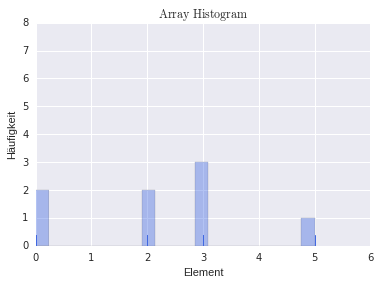

In [450]:
hist = Series(arr)
sns.distplot(hist,kde=False,rug=True,color='royalblue', bins=max(hist.index)*3, label='Häufigkeit')
plt.ylim(0, max(hist.index)+1)
plt.xlabel('Element')
plt.ylabel('Häufigkeit')
plt.title(r'$\mathrm{Array\ Histogram}$')
plt.show()

In [13]:
randint(0,100,1000)

array([46, 52, 82, 56, 96, 95, 95, 81, 97, 51, 23,  7, 84, 51, 88, 43, 43,
        8, 21, 19,  5, 71, 68, 59,  3, 62, 92, 68, 88, 43, 49, 94, 27, 67,
        1, 66, 29, 74, 16, 93, 85, 66, 59, 92, 50, 12, 10,  1, 97, 72, 40,
        2, 64, 26, 38, 51, 74, 81, 39, 88, 35, 97,  5, 66, 94, 38, 45, 70,
       20, 39, 77,  9, 71, 71, 33, 74, 32, 55, 37, 75, 95, 50, 67, 12, 62,
       11, 28, 58, 62, 59, 70, 88, 13, 91,  6, 43,  9, 18,  7, 82, 47, 53,
       21, 78, 52, 29,  6, 81, 95, 98, 55, 48, 72, 60, 90, 65, 91, 89, 12,
       85, 68, 43, 65, 52, 43, 58,  5, 62, 35, 90, 32, 69, 53, 13, 64, 49,
       14, 71, 28,  7, 96, 54, 52, 62, 33, 78, 15, 33, 65, 20, 19, 57, 21,
       86, 96, 68, 41, 21, 87, 36, 60, 60, 90, 29, 95, 23, 43, 80, 17,  3,
       22, 34, 83, 74, 11, 82,  5, 89,  7, 83, 82, 66, 22, 34,  9, 73, 46,
       99, 73, 38, 89, 70, 17, 30, 99, 79, 19, 94,  4, 21, 38, 44, 87, 43,
       84, 93, 11, 83, 78, 53, 35, 21, 21,  0, 85, 32, 28, 14, 66, 11, 77,
       92, 15, 89, 43, 15

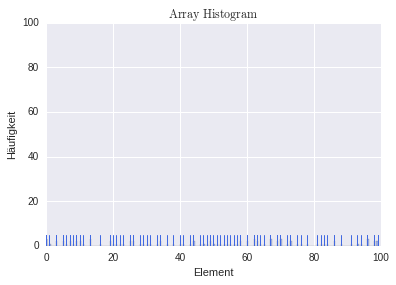


DataFrame A



,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],...,A[90],A[91],A[92],A[93],A[94],A[95],A[96],A[97],A[98],A[99]
0,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
1,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
2,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
3,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
4,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
5,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
6,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
7,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
8,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73
9,60,46,44,62,53,0,49,13,34,0,...,54,40,96,69,48,47,69,34,70,73



DataFrame C



,C[0],C[1],C[2],C[3],C[4],C[5],C[6],C[7],C[8],C[9],...,C[90],C[91],C[92],C[93],C[94],C[95],C[96],C[97],C[98],C[99]
0,0,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
1,0,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
2,0,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
3,0,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
4,0,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
5,0,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
6,1,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
7,1,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
8,1,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98
9,1,3,4,4,6,6,8,9,11,12,...,90,90,91,91,92,93,93,96,96,98



DataFrame B



,B[0],B[1],B[2],B[3],B[4],B[5],B[6],B[7],B[8],B[9],...,B[90],B[91],B[92],B[93],B[94],B[95],B[96],B[97],B[98],B[99]
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,0,,,,,,,,,,...,,,,,,,,,,
6,0,,,,,,,,,,...,,,,,,,,,,
7,0,,,,,,,,,,...,,,,,,,,,,
8,0,,,,,,,,,,...,,,,,,,,,,
9,0,0,,,,,,,,,...,,,,,,,,,,


,A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],...,B[90],B[91],B[92],B[93],B[94],B[95],B[96],B[97],B[98],B[99]
0,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
1,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
2,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
3,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
4,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
5,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
6,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
7,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
8,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,
9,60,46,44,62,53,0,49,13,34,0,...,,,,,,,,,,


In [21]:
test =countingsort(randint(0,100,100))

# PART 2: LAUFZEITBESTIMMUNG 

### Überflüssige Operationen in der Funktion werden für Laufzeitmessung weg-kommentiert

In [3]:
def countingsort_laufzeit(arr):
    
    #Umwandlung in Pandas.Series für Histogrammbildung
    hist = Series(arr)
    #sns.distplot(hist,kde=False,rug=True,color='royalblue', bins=max(hist.index)*3, label='Häufigkeit')
    #plt.ylim(0, max(hist.index)+1)
    #plt.xlabel('Element')
    #plt.ylabel('Häufigkeit')
    #plt.title(r'$\mathrm{Array\ Histogram}$')
    #plt.show()
    
    
    
    #Sortiertes Histogramm, fehlende Werte (NaN) werden durch 0 ersetzt
    sorted_hist = hist.value_counts().sort_index()
    cleaned_hist = Series(sorted_hist, index=range(max(sorted_hist.index)+1)).fillna(0)

    
    #Aufsummierung der Werte im Histogramm
    summed_hist = Series(cleaned_hist.cumsum()[:-1].values, index=range(1, max(arr)+1))
    
    #Bereinigung des summierten Histogramms
    summed_hist_cleaned = Series(summed_hist, index=range(max(arr)+1)).fillna(0)
    
    
    
    
    #Kreiere DataFrames zu A, B und Hilfsarray C
    
    #DataFrame A
    rows = len(arr)            #Anzahl Reihen
    columns_A = []             #Anzahl Spalten
    
    #Benenne die Spalten für A
    for num in range(rows):
        columns_A.append('A[' + str(num) + ']')
        
    #Kreiere DataFrame
    dframe_A = DataFrame(np.array(list(arr)*rows).reshape(rows, rows), columns=columns_A, index=range(rows))
    
    
    #Das Gleiche nun für Hilfsarray C
    hilfs_array = np.array(summed_hist_cleaned.values)
    columns = len(hilfs_array)
    columns_C = []
    for num in range(columns):
        columns_C.append('C[' + str(num) + ']')
    dframe_C = DataFrame(np.array(list(hilfs_array)*rows).reshape(rows ,columns), index=range(rows), columns=columns_C)
    
    
    #Fertige zunächst LEERES DataFrame B an
    #columns_B = []
    #for num in range(rows):
    #    columns_B.append('B[' + str(num) + ']')    

    #dframe_B = DataFrame(np.nan, index=range(rows),columns=columns_B).fillna(' ')
    
    
    #Kreiere Dict, in dem Keys und Values für das später fertig sortierte Array B angelegt werden 
    b = {}
    lookup_value = 0
    for i in range(rows):
        #Iteration der Werte in C sobald in A nachgeschlagen 
        if i > 0:
            dframe_C['C['+str(lookup_value)+']'][i:] += 1
        
        #Wert, der in C nachgeschlagen, und in B an Stelle C[A[i]] eingefügt werden soll
        lookup_value = dframe_A.values[i][i]
        key = 'B[' + str(int(dframe_C.values[i][lookup_value])) + ']'
        b[key] = [lookup_value,i]
        
    result = []
    for i in range(len(b)):
        if b['B[' + str(i) + ']'][0]:
            result.append(b['B[' + str(i) + ']'][0])
          
    
    #Füge Werte schließlich sortiert in B ein
    #for key, value in b.items():
    #    dframe_B[key][value[1]:] = value[0]    
    
    #Konkatenieren der 3 DataFrames
    #final_dframe = pd.concat([dframe_A, dframe_C, dframe_B], axis=1)

    #print('\nDataFrame A\n')
    #display(dframe_A)
    #print('\nDataFrame C\n')
    #display(dframe_C)
    #print('\nDataFrame B\n')
    #display(dframe_B)
    
    #display(final_dframe)
    
    return result




# Laufzeitenmessung

####  Es werden Arrays mit 10, 100, 1.000, und 10.000 Elemente eingelesen. Anschließend wird jeweils über 10 Laufzeiten gemittelt.  

In [87]:
laufzeiten = {}
arr = [randint(0,1000,10),
       randint(0,1000,100),
       randint(0,1000,1000), 
       randint(0,1000,10000),
       randint(0,1000,100000)]

for i in range(5):
    n = 0
    laufzeit_arr = []
    while(n <10):
        start = timeit.default_timer()
        countingsort_laufzeit(arr[i])
        laufzeit_arr.append(timeit.default_timer() - start)
        n+=1
    laufzeiten[i] = laufzeit_arr
    print (laufzeiten)

mean = []
for value in laufzeiten.values():
    mean.append(np.mean(value))

{0: [0.07322160100011388, 0.014174009000271326, 0.0155486949997794, 0.01337327799956256, 0.013180726999962644, 0.014378434999343881, 0.013645938999616192, 0.013135748999957286, 0.013102084999445651, 0.013517919999685546]}
{0: [0.07322160100011388, 0.014174009000271326, 0.0155486949997794, 0.01337327799956256, 0.013180726999962644, 0.014378434999343881, 0.013645938999616192, 0.013135748999957286, 0.013102084999445651, 0.013517919999685546], 1: [0.1782028289999289, 0.09589815799972712, 0.11053249199994752, 0.11105741899973509, 0.10885120199964149, 0.09693208899989258, 0.09206931900007476, 0.09451830499983771, 0.09530199300024833, 0.09342088799985504]}
{0: [0.07322160100011388, 0.014174009000271326, 0.0155486949997794, 0.01337327799956256, 0.013180726999962644, 0.014378434999343881, 0.013645938999616192, 0.013135748999957286, 0.013102084999445651, 0.013517919999685546], 1: [0.1782028289999289, 0.09589815799972712, 0.11053249199994752, 0.11105741899973509, 0.10885120199964149, 0.0969320889

MemoryError: 

# Gemittelte Laufzeiten für jeweils 10, 100, 1.000 & 10.000 Elemente

In [91]:
mean = []
for value in laufzeiten.values():
    mean.append(np.mean(value))
mean

[0.019727843799773836,
 0.10767846939988886,
 1.1564006290000179,
 27.512118489999921]

# PLOT 

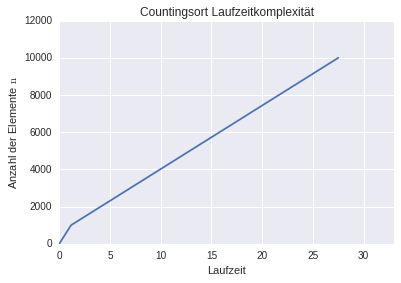

In [92]:
n = [10,100,1000,10000]
plt.plot(mean,n[:len(mean)])
plt.title('Countingsort Laufzeitkomplexität')
plt.ylim(0,max(n)*1.2)
plt.xlim(0,max(mean)*1.2)
plt.xlabel('Laufzeit')
plt.ylabel(r'Anzahl der Elemente $\mathrm{n}$ ')
plt.savefig('Countingsort Laufzeitkomplexität')
plt.show()

In [88]:
arr = randint(0,1000,100000)
laufzeit_extra = []
while(n <10):
    start = timeit.default_timer()
    countingsort_laufzeit(arr)
    laufzeit_extra.append(timeit.default_timer() - start)


MemoryError: 